# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Para el paso uno haré lo siguiente:
+ Revisar los archivos csv para verificar el formato que tienen sus valores.
+ Importar las librerías adecuadas para todo el proyecto.
+ Leer y guardar cada archivo en un dataframe por separado e imprimir información básica para analizar sus elementos.

In [48]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leer y guardar los archivos de datos en los DataFrames y luego imprimir información de cada uno

In [49]:
#Leer el archivo instacart_orders y convertirlo en un dataframe
df_instacart_orders = pd.read_csv('datasets/instacart_orders.csv', sep= ';')
#Imprimir información del dataframe
print(df_instacart_orders.info())
print(df_instacart_orders.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
    order_id  user_id  order_number  order_dow  order_hour_of_day  \
0    1515936   183418            11          6                 13   
1    1690866   163593             5          5                 12   
2    1454967    39980             4          5                 19   
3    1768857    82516            56          0                 20   
4    3007858   196724             2          4           

In [50]:
#Leer el archivo products y convertirlo en un dataframe
df_products = pd.read_csv('datasets/products.csv', sep= ';')
#Imprimir información del dataframe
print(df_products.info())
print(df_products.sample(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
       product_id                                   product_name  aisle_id  \
43746       43747          Sport Anti Perspirant & Deodorant Gel        80   
10246       10247                       Roasted Garlic Onion Jam        88   
37328       37329       Total Advanced Floss Tip Soft Toothbrush        20   
34229       34230           4% Milkfat Small Curd Cottage Cheese       108   
19303       19304                     Currant English Tea Scones        93   
18961       18962                   Arroz Calasparra Paella Rice        63   
38479       38480       Organic G

In [51]:
#Leer el archivo order_products y convertirlo en un dataframe
df_order_products = pd.read_csv('datasets/order_products.csv', sep= ';')
#Imprimir información del dataframe
print(df_order_products.info(show_counts=True))
print(df_order_products.sample(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
         order_id  product_id  add_to_cart_order  reordered
2033632    479537        4313                7.0          1
3793079   1042461        7647                5.0          0
3793815    850120       27521               16.0          1
3945602   1807681        2855                3.0          1
2320462    739003       36695                1.0          1
84932      446872       17672               22.0          1
4401154     90933       26315               13.0          0
761991    2976455       30489                8.0   

In [52]:
#Leer el archivo aisles y convertirlo en un dataframe
df_aisles = pd.read_csv('datasets/aisles.csv', sep= ';')
#Imprimir información del dataframe
print(df_aisles.info())
print(df_aisles.sample(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
     aisle_id                       aisle
0           1       prepared soups salads
30         31                refrigerated
50         51      preserved dips spreads
118       119              frozen dessert
113       114           cleaning products
2           3         energy granola bars
49         50      fruit vegetable snacks
97         98               juice nectars
45         46                    mint gum
82         83            fresh vegetables
39         40               dog food care
133       134  specialty wines champagnes
73         74             dish detergents
24         25                        soap
108       109                   skin care
103       104    

In [53]:
#Leer el archivo departments y convertirlo en un dataframe
df_departments = pd.read_csv('datasets/departments.csv', sep= ';')
#Imprimir información del dataframe
print(df_departments.info())
print(df_departments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
1

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


+ Todos los archivos tienen nombres adecuados para sus columnas, en minúsculas y con formato snake_case.
+ Todos los archivos tienen sus valores separados por ';', por lo que fue necesario colocar ese parámetro en el método read_csv.
+ Existen valores ausentes o nulos en los archivos - columnas
    + instacart_orders - days_since_prior_order
    + 
products - product_na
    + 
order_products - add_to_cart_or
+ Algunas columnas tienen formato de punto flotante que parece no ser necesario y se pueden convertir a entero, hay que verificarlo.
+ La descripción de los productos en el archivo products tiene formato capital, cada palabra inicia con mayúscula y podría contener productos duplicados, hay que transformar esos datos a minúsculas y verificar.der

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [54]:
# Revisa si hay pedidos duplicados
# Imprimo el número de filas duplicadas
print(df_instacart_orders.duplicated().sum())
#Creo un nuevo dataframe para guardar sólo las filas duplicadas. Este dataframe debería tener tantas filas
#el número calculado en el paso anterior
df_duplicates = df_instacart_orders[df_instacart_orders.duplicated()]
#Imprimo el nuevo dataframe en orden ascendente para la columna order_id
print(df_duplicates.sort_values('order_id'))
#Imprimo una de las filas del dataframe original filtrando por un order_id específico, para comprobar que su
#duplicado es idéntico en todas las columnas
print(df_instacart_orders[df_instacart_orders['order_id']==1021560])

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
371905    391768    57671            19          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
273805   1112182   202304            84          3                  2   
411408   1286742   183220            48          3                  2   
266232   1782114   106752             1          3                  2   
230807   1918001   188546            14          3                  2   
323900   1919531   191501            32          3                  2   
441599   2125197    14050            48          3                  2   
223105   2160484   107525            16          3                  2   
345917   2232988    82565             1         

In [55]:
#Elimino las filas duplicadas que se encontraron y reinicio el índice
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)
#Compruebo que ya no existen filas duplicadas
df_instacart_orders.duplicated(keep=False).sum()

0

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

+ Había 15 filas duplicadas. La función .duplicated() identifica únicamente las filas que son completamente iguales en todos sus valores, por lo que, todas las filas duplicadas que se encontraron eran iguales en los valores para todas sus columnas.
+ Todas las órdenes duplicadas son del miércoles a las 2 am.

In [56]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

#Compruebo primero qué valores se usan para registrar las horas del día. 
print(df_instacart_orders['order_hour_of_day'].sort_values().unique())

#Creo un filtro usando el valor 3 para order_dow y 2 para order_hour_of_day y otro filtro sólo para los días miércoles
filter_day_hour = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]#['order_id']
filter_day = df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_id']
#Imprimo las órdenes que cumplen con el filtro de día y hora
print(filter_day_hour.head(30).sort_values(by='order_id'),'\n')
#Uso el mismo filtro para contar el número de órdenes
print(f'Pedidos los miércoles a las 2 am: {filter_day_hour.count()}')
#Uso el filtro de día para contar el número de órdenes de los miércoles
print(f'Pedidos totales los miércoles: {filter_day.count()}')
#Calculo la relación entre el número total de pedidos los miércoles contra los miércoles a las 2 am
print(f'La relación es de: {filter_day_hour.count()/filter_day.count()*100} %')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
29129     353088    46038             4          3                  2   
18420     382357   120200            19          3                  2   
119251    408114    68324             4          3                  2   
15506     553049    58599            13          3                  2   
74991     592699   175625             2          3                  2   
24691     690242    77357             2          3                  2   
99462     794638    50898            24          3                  2   
109466    851025   168387            54          3                  2   
113422   1353704   178429             3          3                  2   
25376    1378085    75705            21          3                  2   
62357    1399416    93151            34          3                  2   
48024    1453300    69262            27          3

¿Qué sugiere este resultado?

Los pedidos hechos los miércoles a las 2 am representan sólo el 0.17% de los pedidos totales hechos todos los miércoles. 

Describe brevemente tus hallazgos y lo que hiciste con ellos

+ A partir del resultado específico podríamos determinar si es factible mantener el servicio durante horas específicas de la madrugada.

### `products` data frame

In [57]:
# Verifica si hay filas totalmente duplicadas
# Imprimo el número de filas duplicadas
print(df_products.duplicated().sum())

0


In [58]:
# Verifica si hay IDs duplicadas de productos
print(df_products['product_id'].duplicated().sum())

0


In [59]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
#Cuento el número de nombres de productos duplicados
print(df_products['product_name'].str.upper().duplicated().sum())
#Creo un dataframe nuevo con la información de los duplicados y lo imprimo
df_products_duplicated=df_products[df_products['product_name'].str.upper().duplicated()]
print(df_products_duplicated)

1361
       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71         

In [60]:
# Revisa si hay nombres duplicados de productos no faltantes
#Creo un dataframe nuevo con todos los productos que sí tienen un nombre en product_name. Encontré la función notna() en la documentación de pandas.
df_notna_products = df_products[df_products['product_name'].notna()]
#Convierto el nombre de los productos a mayúsculas en el dataframe anterior
df_notna_products['product_name'] = df_notna_products['product_name'].str.upper()
print(df_notna_products)
#Cuento el número de elementos duplicados entre los productos que sí tienen nombre
print(df_notna_products['product_name'].duplicated().sum())
#Creo un dataframe nuevo para guardar todos los elementos duplicados, el número de elementos/filas debería ser igual que el número anterior
df_notna_duplicates=df_notna_products[df_notna_products['product_name'].duplicated()]
print(df_notna_duplicates)
#Compruebo uno de los nombres duplicados que encontré
print(df_notna_products[df_notna_products['product_name']=='BIOTIN 1000 MCG'])

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               5                          GREEN CHILE ANYTIME SAUCE   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

C:\Users\Javi\AppData\Local\Temp\ipykernel_37840\3172105299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notna_products['product_name'] = df_notna_products['product_name'].str.upper()


Describe brevemente tus hallazgos y lo que hiciste con ellos.

+ Existen 104 productos cuyo nombre está duplicado, sin embargo, tienen product_id únicos. No deberían ser borrados por este hecho para no afectar los análisis.
+ A los productos que no tienen nombre, debo primero saber si son parte de alguna orden antes de decidir si pudiera borrarlos o simplemente cambiar el valor NaN por otra cosa.

### `departments` data frame

In [61]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())
print(df_departments)

0
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [62]:
# Revisa si hay IDs duplicadas de productos
df_departments['department'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

+ Este dataframe sólo tiene 20 filas, por lo que se puede visualizar completo.
+ No existen filas completas, IDs o nombres de departamentos duplicados.
+ Existen dos departamentos que llaman mi atención, 'other' y 'missing'. ¿Podrían integrarse todos los elementos que coinciden con 'missing' y ponerlos en 'other'?

### `aisles` data frame

In [63]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [64]:
# Revisa si hay IDs duplicadas de productos
df_aisles.sort_values('aisle',inplace=True)
print(df_aisles)
print(df_aisles['aisle_id'].duplicated().sum())
print(df_aisles['aisle'].duplicated().sum())

     aisle_id                          aisle
100       101         air fresheners candles
65         66                    asian foods
81         82               baby accessories
101       102            baby bath body care
91         92              baby food formula
..        ...                            ...
59         60              trash bags liners
46         47           vitamins supplements
114       115  water seltzer sparkling water
61         62                    white wines
119       120                         yogurt

[134 rows x 2 columns]
0
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

+ En este dataframe no hay filas, IDs o nombres de isla duplicados

### `order_products` data frame

In [65]:
# Revisa si hay filas totalmente duplicadas
df_order_products.info()
print(df_order_products.sample(20).sort_values(by='order_id'))
df_order_products.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
         order_id  product_id  add_to_cart_order  reordered
1194482       888       32523               13.0          0
2597295      9381       40198                8.0          1
662714     128223       37215                8.0          0
589245     174911       39984               15.0          1
404512     331010       28599                1.0          0
817935     340272       42585                3.0          1
2561249    602201       25493                8.0          1
1528628    821469       10385                9.0          0
791538     898464       19678                1.0          0
2375884    986185       49675               

0

In [66]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# print(df_order_products.min())
# print(df_order_products.max())
#Creo un nuevo dataframe con los duplicados que encuentre en la columna order_id
df_duplicated_orders=df_order_products[df_order_products['order_id'].duplicated(keep=False)]
print(df_duplicated_orders)
print()
#Creo un nuevo dataframe con los duplicados que encuentre en las columna order_id y product_id a la vez
df_duplicated_orders_subset=df_order_products[df_order_products.duplicated(keep=False,subset=(['order_id','product_id']))]
print(df_duplicated_orders_subset)
print()
#Imprimo los valores mínimos y máximos de todas las columnas del nuevo dataframe
print(df_duplicated_orders.min())
print(df_duplicated_orders.max())
#Imprimo una lista ordenada con los valores únicos de order_id
print(df_duplicated_orders['order_id'].sort_values().unique())
print(df_duplicated_orders)
#Creo un dataframe nuevo que contenga únicamente elementos correspondientes a un número de orden determinado
df_temp=df_duplicated_orders[df_duplicated_orders['order_id']==4]#Este 4 corresponde al número de orden que quiero filtrar
df_temp=df_temp.sort_values(by='add_to_cart_order')
print(df_temp)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4523160 rows x 4 columns]

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64
order_id             3421077.0
product_id      

Describe brevemente tus hallazgos y lo que hiciste con ellos.

+ Este dataframe duplica el order_id para cada producto que se haya agregado en esa orden.
+ El primer número de orden registrado es el 4. ¿Qué pasó con los anteriores?
+ Al ordenar por número de orden, noté que hay más ordenes faltantes, debería ser una numeración consecutiva. ¿Por qué faltan números de orden?

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [67]:
# Encuentra los valores ausentes en la columna 'product_name'
#Busco e imprimo el número de productos únicos en el dataframe original
df_unique=df_products['product_name'].nunique()
print(df_unique)
print(df_products['product_name'].str.upper().nunique())
#Cuento el número de valores ausentes de la columna product_name
print(df_products['product_name'].isna().sum())
#Creo un nuevo dataframe con las filas que no tienen product_name
df_NaN_products=df_products[df_products['product_name'].isna()]
print(df_NaN_products)
# print(df_products)

48436
48332
1258
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

+ Hay 48436 productos registrados, 1258 sin nombre, y suman en total los 49694 registros del dataframe original.
+ Hay 104 elementos duplicados en los nombres de productos.

In [68]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_NaN_products['aisle_id'].unique())
print(df_NaN_products['aisle_id'].min())
print(df_NaN_products['aisle_id'].max())

[100]
100
100


Describe brevemente cuáles son tus hallazgos.

+ Sí,todos los productos a los que les falta nombre están relacionados con el ID 100

In [69]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_NaN_products['department_id'].unique())
print(df_NaN_products['department_id'].min())
print(df_NaN_products['department_id'].max())

[21]
21
21


Describe brevemente cuáles son tus hallazgos.

+ Sí, todos los productos a los que les falta nombre están relacionados con el ID 21

In [70]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles[df_aisles['aisle_id']==100])
print(df_departments[df_departments['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

+ El ID 100 no tiene un nombre
+ El ID 21 no tiene un nombre
+ Los productos que no tienen nombre están catalogados con aisle_id "missing" y department_id "missing". Esto me sugiere que esos productos ya no están disponibles. 

In [71]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name']=df_products['product_name'].fillna('unknown')
#Imprimo la suma de valores ausentes por columna del dataframe original
print(df_products.isna().sum())
#Imprimo la suma de valores ausentes sólo de la columna product_name del dataframe original
print(df_products['product_name'].isna().sum())
#Creo un nuevo dataframe que contenga sólo los valores ausentes de la columna product_name y lo imprimo
df_NaN_products=df_products[df_products['product_name'].isna()]
print(df_NaN_products)

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

+ Cambié los valores ausentes por 'unknown' para poder utilizar todos los registros del dataframe como parte del análisis.

### `orders` data frame

In [72]:
# Encuentra los valores ausentes
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [73]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#Creo un nuevo dataframe que guarde todas las filas cuyo valor en la columna days_since_prior_order sea nulo/ausente
df_NaN_orders = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()]
print(df_NaN_orders)
#Imprimo los valores mínimo y máximo de la columna order_number para comprobar si hay números de orden distintos de 1
print(df_NaN_orders['order_number'].min())
print(df_NaN_orders['order_number'].max())
print(df_NaN_orders['order_number'].unique())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos.

+ Los valores ausentes para days_since_prior_order corresponden a todas las órdenes número 1 de todos los clientes. Esto me sugiere que el sistema no registra los días transcurridos desde la última orden puesto que es un cliente/orden nuevo.

### `order_products` data frame

In [74]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [75]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())
print(df_order_products['add_to_cart_order'].sort_values().unique())

1.0
64.0
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. nan]


Describe brevemente cuáles son tus hallazgos.

+ El número mínimo de orden en que se añadió algo al carrito es 1
+ El número máximo de orden en que se añadió algo al carrito es 64.
+ Comprobé que no faltan elementos intermedios, pero esto no comprueba que para una sola orden no hace falta algún elemento intermedio.

In [76]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_NaN_cart=df_order_products[df_order_products['add_to_cart_order'].isna()]
print(df_NaN_cart.sort_values(by='order_id'))
order_ids_nan=df_NaN_cart['order_id']
print(order_ids_nan)

         order_id  product_id  add_to_cart_order  reordered
2437093      9310       25753                NaN          0
3195573     61355       39972                NaN          0
3941595     61355       17807                NaN          0
2968806     61355       29660                NaN          0
3965219     61355       49325                NaN          0
...           ...         ...                ...        ...
3760909   3383594          63                NaN          0
3784932   3383594       49144                NaN          1
2772397   3383594       46710                NaN          0
1537276   3383594       15076                NaN          0
1038616   3383594       15424                NaN          1

[836 rows x 4 columns]
737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [77]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
#Creo una máscara para buscar los order_id que identifiqué con add_to_cart_order vacío en el df_order_products
mask=df_order_products['order_id'].isin(df_NaN_cart['order_id'])
# print(mask)
#Aplico la máscara a df_order_products para quedarme sólo con los order_id que contienen algún vacío en add_to_cart_order, y los ordeno
filtered=df_order_products[mask].sort_values(by=['order_id','add_to_cart_order','product_id'])

#Uso estos prints para comprobar si las órdenes que contenían un vacío en add_to_cart_order, tienen más de 64 elementos
print(filtered[(filtered['order_id']==129627) & (filtered['add_to_cart_order'].isna())])
print(filtered[filtered['order_id']==129627].to_string())

#Aquí compruebo que el valor más grande en add_to_cart_order es 64
print(filtered['add_to_cart_order'].max())

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
df_groupby_order=filtered.groupby(by='order_id')

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(df_groupby_order.count())
print(df_groupby_order.count().min())

         order_id  product_id  add_to_cart_order  reordered
3890724    129627       13852                NaN          0
2481755    129627       20280                NaN          0
3558313    129627       22627                NaN          0
69773      129627       31372                NaN          0
1526358    129627       48697                NaN          0
         order_id  product_id  add_to_cart_order  reordered
3992514    129627        2295                1.0          1
3179377    129627       47766                2.0          1
1570680    129627       21903                3.0          0
1984147    129627       24852                4.0          1
2638955    129627       15290                5.0          1
2456695    129627       39561                6.0          1
1471354    129627       26209                7.0          1
3434205    129627       47626                8.0          1
433759     129627       21137                9.0          1
883589     129627        7781           

Describe brevemente cuáles son tus hallazgos.

+ Encontré que el valor más grande en add_to_cart_order es 64, sin embargo, hay órdenes que tienen más de 64 productos.
+ Parece que se coloca NaN en add_to_cart_order a todos los productos de la misma orden que se agregan después de alcanzar 64 productos. No puedo comprobar si tiene que ver con el orden, es decir, que justo después del producto 64, se empiece a llenar con NaN; o que en cualquier momento de estar agregando productos a la orden, suceda que se coloca NaN, y al "recuperarse" continúa con el consecutivo del último número que se agregó. 

In [78]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].fillna(999).astype('int')
print(df_order_products['add_to_cart_order'].dtypes)
df_order_products.isna().sum()

int32


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

+ No comprendo de qué sirve asignarle un número tan grande a los ausentes en esa columna. 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


+ Los datos en general proporcionan buena información sin hacer muchas transformaciones.
+ Algunos valores ausentes pueden deberse a condiciones programadas en el sistema, como el caso de usuarios/órdenes nuevas.
+ Había algunas órdenes y productos duplicados en los registros. Las órdenes duplicadas se pueden eliminar, los productos duplicados no porque a pesar de duplicar su nombre, tienen un ID de producto diferente y por tanto pudieron haber sido agregados a alguna orden. Eliminar estos productos podría traer problemas al análisis.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [79]:
print(df_instacart_orders['order_dow'].sort_values().unique())
print(df_instacart_orders['order_dow'].dtypes)

[0 1 2 3 4 5 6]
int64


In [80]:
print(df_instacart_orders['order_hour_of_day'].sort_values().unique())
print(df_instacart_orders['order_hour_of_day'].dtypes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
int64


Escribe aquí tus conclusiones

+ Los valores en esas columnas están dentro de los rangos especificados

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

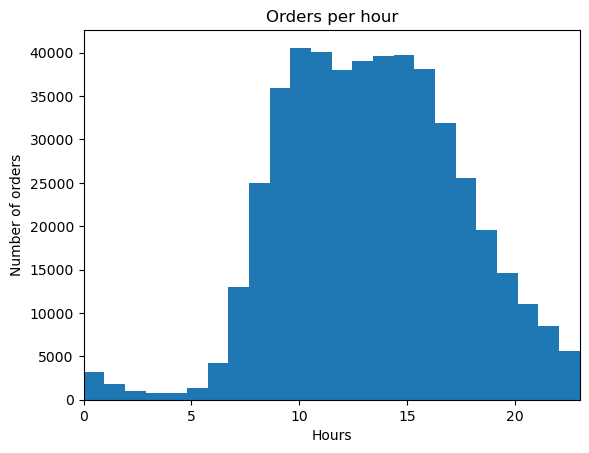

order_hour_of_day
4       765
3       770
2       989
5      1371
1      1763
0      3180
6      4215
23     5611
22     8512
21    11019
7     13043
20    14624
19    19547
8     25024
18    25510
17    31930
9     35896
12    38034
16    38112
13    39007
14    39631
15    39789
11    40032
10    40578
Name: order_id, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
13053
2.7253252935576007
80610
16.830496584208856


In [81]:
#Creo un histograma que muestre el número de órdenes por cada hora del día y lo imprimo
orders_per_hour = df_instacart_orders['order_hour_of_day'].plot(kind='hist',
                                              bins=24,
                                              title='Orders per hour',
                                              xlabel='Hours',
                                              ylabel='Number of orders',
                                              xlim=[0,23])
plt.show(orders_per_hour)
#Agrupo todas las órdenes por hora del día y cuento el número de órdenes, después ordeno esta lista de menor a mayor
print(df_instacart_orders.groupby(by='order_hour_of_day')['order_id'].count().sort_values())
#Obtengo información del dataframe original
print(df_instacart_orders.info())
#Filtro del dataframe original todas las órdenes que se hacen desde media noche hasta las 6 am
morning_orders=df_instacart_orders[df_instacart_orders['order_hour_of_day']<=6]
print(morning_orders['order_id'].count())
#Calculo la relación entre todas estas órdenes y el número total de órdenes registradas
morning_orders_ratio=morning_orders['order_id'].count()/df_instacart_orders['order_id'].count()*100
print(morning_orders_ratio)
#Filtro del dataframe original todas las órdenes que se hacen a las 10 y 11 am
top_orders=df_instacart_orders[(df_instacart_orders['order_hour_of_day']==10) | (df_instacart_orders['order_hour_of_day']==11)]
print(top_orders['order_id'].count())
#Calculo la relación entre todas estas órdenes y el número total de órdenes registradas
top_orders_ratio=top_orders['order_id'].count()/df_instacart_orders['order_id'].count()*100
print(top_orders_ratio)

Escribe aquí tus conclusiones

+ El mayor número de órdenes se dan entre 8 am y 6 pm.
+ Las 10 y 11 am muestran el tope de órdenes registradas.
+ Hay menos de 5000 órdenes registradas cada hora, de la media noche a las 6 am.
+ El número de órdenes entre media noche y 6 am representa sólo el 2.72% del total de órdenes registradas.
+ El número de órdenes a las 10 y 11 am representa en conjunto el 16.83% del total de órdenes registradas.

### [A3] ¿Qué día de la semana compran víveres las personas?

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

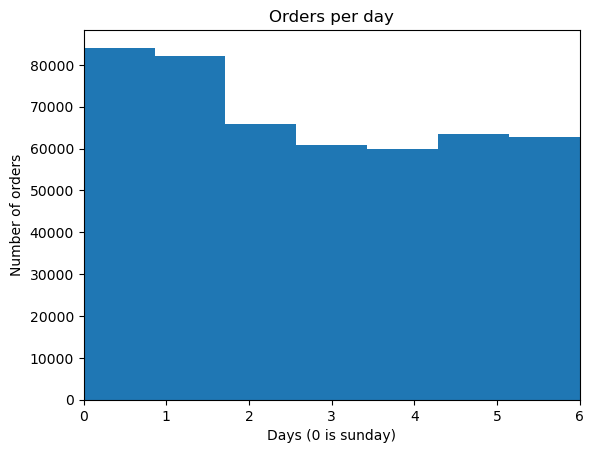

   order_dow  order_id  user_id  order_number  order_hour_of_day  \
0          0     84090    84090         84090              84090   
1          1     82185    82185         82185              82185   
2          2     65833    65833         65833              65833   
3          3     60897    60897         60897              60897   
4          4     59810    59810         59810              59810   
5          5     63488    63488         63488              63488   
6          6     62649    62649         62649              62649   

   days_since_prior_order  
0                   78749  
1                   77269  
2                   61925  
3                   57271  
4                   56395  
5                   59907  
6                   58619  


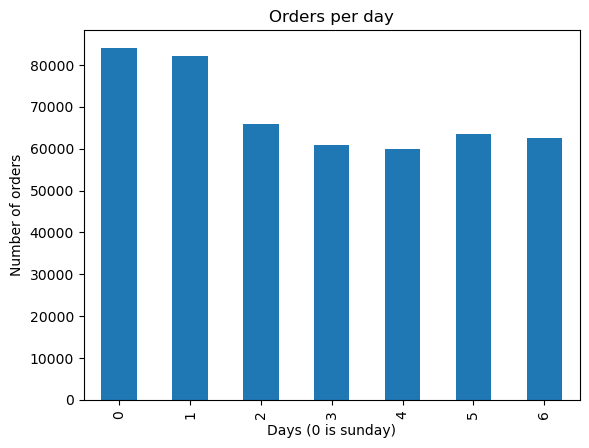

order_dow
4    59810
3    60897
6    62649
5    63488
2    65833
1    82185
0    84090
Name: order_id, dtype: int64


In [82]:
#Creo un histograma que muestre el número de órdenes por día y lo imprimo
print(df_instacart_orders)
orders_per_day = df_instacart_orders['order_dow'].plot(kind='hist',
                                              bins=7,
                                              title='Orders per day',
                                              xlabel='Days (0 is sunday)',
                                              ylabel='Number of orders',
                                              xlim=[0,6])
plt.show(orders_per_day)
groupby=df_instacart_orders.groupby(by='order_dow',as_index=False).count()
print(groupby)
groupby['order_id'].plot(kind='bar',                                              
                                              x='order_dow',
                                              title='Orders per day',
                                              xlabel='Days (0 is sunday)',
                                              ylabel='Number of orders',
                                              xlim=[0,6])
plt.show()
#Agrupo todas las órdenes por día y cuento el número de órdenes, después ordeno esta lista de menor a mayor
print(df_instacart_orders.groupby(by='order_dow')['order_id'].count().sort_values())

Escribe aquí tus conclusiones

+ El domingo y lunes son los días que registran más órdenes
+ De martes a sábado, el número de órdenes se muestra más estable, entre 60 y 65 mil órdenes por día.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

0.0
30.0


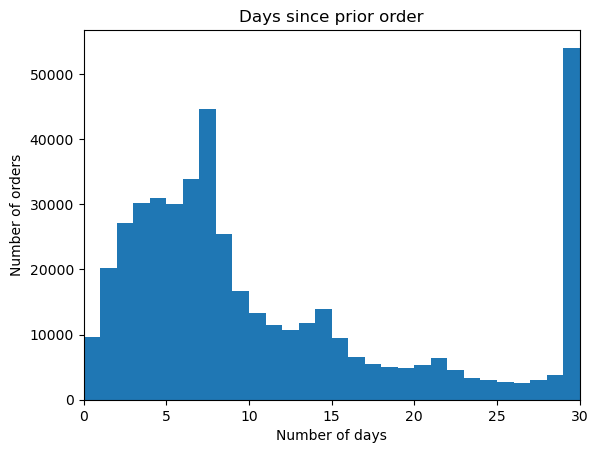

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
5        1843871    20084             5          0                 11   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
1                          9.0  
2                          2.0  
3                       

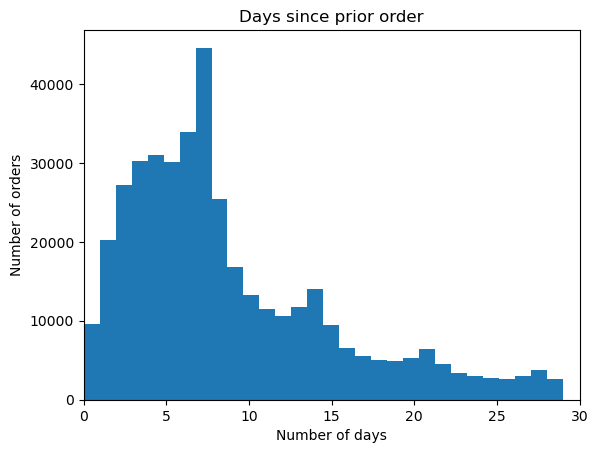

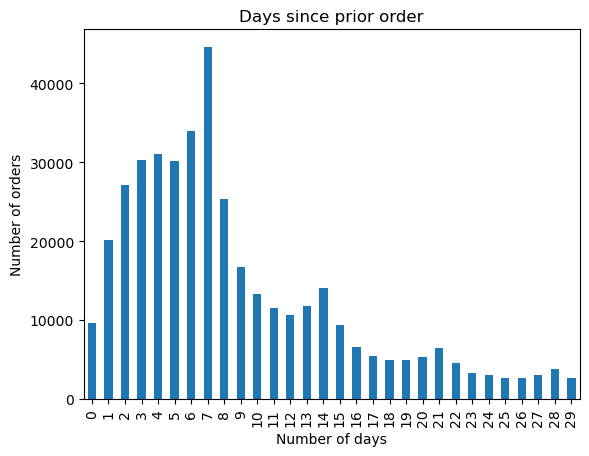

In [83]:
#Creo un histograma que muestre el número de órdenes por día y lo imprimo
print(df_instacart_orders['days_since_prior_order'].min())
print(df_instacart_orders['days_since_prior_order'].max())
days_to_order = df_instacart_orders['days_since_prior_order'].plot(kind='hist',
                                              bins=30,
                                              title='Days since prior order',
                                              xlabel='Number of days',
                                              ylabel='Number of orders',
                                              xlim=[0,30])
plt.show(days_to_order)
days_to_order_no30=df_instacart_orders[df_instacart_orders['days_since_prior_order']!=30.0]
print(days_to_order_no30)
days_to_order_no30['days_since_prior_order'].plot(kind='hist',
                                              bins=30,
                                              title='Days since prior order',
                                              xlabel='Number of days',
                                              ylabel='Number of orders',
                                              xlim=[0,30])
plt.show()

groupby=days_to_order_no30.groupby(by='days_since_prior_order',as_index=False).count()
# print(groupby)
groupby['order_id'].plot(kind='bar',                                              
                                              x='days_since_prior_order',
                                              title='Days since prior order',
                                              xlabel='Number of days',
                                              ylabel='Number of orders')
plt.show()

Escribe aquí tus conclusiones

+ El tiempo mínimo de espera para hacer un pedido nuevo es de 0 días.
+ El tiempo máximo de espera para hacer un pedido nuevo es de 30 días.
+ Los tiempos de espera más usuales son 7 y 30 días.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

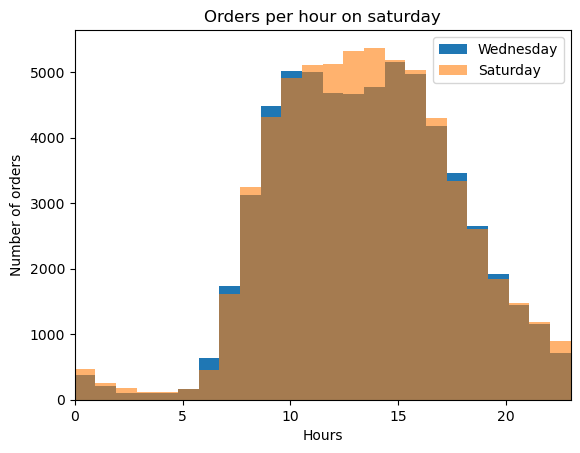

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64
order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


In [84]:
#Creo un histograma que muestre el número de órdenes por cada hora del día los miércoles y lo imprimo
df_instacart_orders[df_instacart_orders['order_dow']==3]['order_hour_of_day'].plot(kind='hist',
                                              bins=24,
                                              title='Orders per hour on wenesday',
                                              xlabel='Hours',
                                              ylabel='Number of orders',
                                              xlim=[0,23])
#plt.show()
#Creo un histograma que muestre el número de órdenes por cada hora del día los sábados y lo imprimo
df_instacart_orders[df_instacart_orders['order_dow']==6]['order_hour_of_day'].plot(kind='hist',
                                              bins=24,
                                              title='Orders per hour on saturday',
                                              xlabel='Hours',
                                              ylabel='Number of orders',
                                              xlim=[0,23],
                                              alpha=0.6)
#Imprimo ambos histogramas en la misma gráfica
plt.legend(['Wednesday','Saturday'])
plt.show()

#Imprimo el número de órdenes para el miércoles y sábado, agrupados por horas del día
print(df_instacart_orders[df_instacart_orders['order_dow']==3].groupby(by='order_hour_of_day')['order_hour_of_day'].count())#['order_hour_of_day'].sort_values())
print(df_instacart_orders[df_instacart_orders['order_dow']==6].groupby(by='order_hour_of_day')['order_hour_of_day'].count())#['order_hour_of_day'].sort_values())

Escribe aquí tus conclusiones

+  Sí hay diferencia en las distribuciones de órdenes de los miércoles contra los sábados aunque sólo en las horas pico entre 10 am y 1 pm. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

1
100


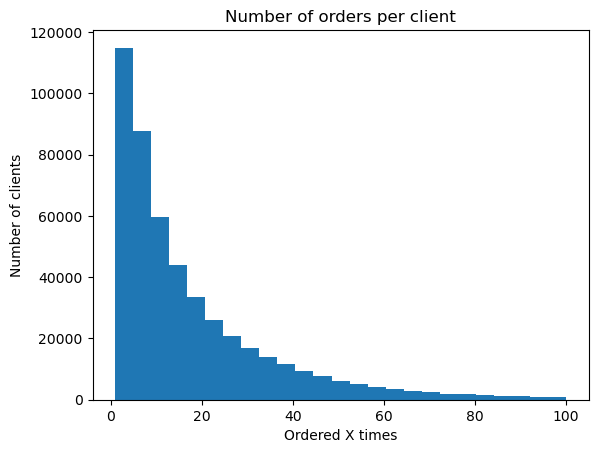

In [85]:
#Imprimo el mínimo número de órdenes registradas
print(df_instacart_orders['order_number'].min())
#Imprimo el máximo número de órdenes registradas
print(df_instacart_orders['order_number'].max())
#print(df_instacart_orders.groupby(by='order_number').count().sort_values(by='order_id',ascending=False))
#Creo un histograma que muestre en cada barra el número de órdenes hechas.
df_orders_per_client = df_instacart_orders['order_number'].plot(kind='hist',
                                                                bins=25,
                                                                title='Number of orders per client',
                                                                xlabel='Ordered X times',
                                                                ylabel='Number of clients')
plt.show()

Escribe aquí tus conclusiones

+ La mayoría de los pedidos son de una o dos veces únicamente.
+ El número mínimo de órdenes registradas por cliente es de 1. ¿Podría un cliente registrarse, no pedir nada y que su order_number sea 0?
+ El número máximo de órdenes registradas por cliente es de 100. ¿Está el sistema limitado a no registrar más órdenes para un solo cliente?

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [86]:
#Agrupo por product_id y cuento el número de registros de cada uno, muestro en orden descendente los 20 elementos con más apariciones.
product_ids1 = df_order_products.groupby(by='product_id',as_index=False).count().sort_values(by='order_id',ascending=False).head(20)

# #Busco los productos del paso anterior en el dataframe que contiene los nombres de los productos y hago un merge interno
# #Con esto muestro los nombres de los 20 productos más populares
top_products_names = product_ids1.merge(df_products,on='product_id')

#Elimino las columnas que no necesito de la tabla resultante
top_products_names=top_products_names.drop(labels=['add_to_cart_order','reordered'],axis='columns')

#Renombro una columna para que sirva como el número total de órdenes de cada producto
top_products_names=top_products_names.rename(columns={'order_id':'total_orders'})
print(top_products_names)

    product_id  total_orders              product_name  aisle_id  \
0        24852         66050                    Banana        24   
1        13176         53297    Bag of Organic Bananas        24   
2        21137         37039      Organic Strawberries        24   
3        21903         33971      Organic Baby Spinach       123   
4        47209         29773      Organic Hass Avocado        24   
5        47766         24689           Organic Avocado        24   
6        47626         21495               Large Lemon        24   
7        16797         20018              Strawberries        24   
8        26209         19690                     Limes        24   
9        27845         19600        Organic Whole Milk        84   
10       27966         19197       Organic Raspberries       123   
11       22935         15898      Organic Yellow Onion        83   
12       24964         15292            Organic Garlic        83   
13       45007         14584          Organic Zu

Escribe aquí tus conclusiones

+ Los productos más populares son los del departamento 4 y en las islas de frutas y vegetales frescos, y frutas y vegetales empacados.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

         order_id  product_id  add_to_cart_order  reordered
2043091         4       34862                  8          1
1420535         4       10054                  5          1
1299531         4       32645                 12          1
311805          4       46842                  1          0
4107072         4       40285                  9          1
3189411         4       25146                 11          1
2834230         4       26434                  2          1
3977678         4       21351                  6          1
1295279         4       39758                  3          1
2507695         4       17616                 10          1
1169276         4       27761                  4          1
2502556         4       41276                 13          1
1172585         4       22598                  7          1
3310901         9       31506                  8          1
2585632         9       34203                  6          1
order_id
4          13
9          15
11 

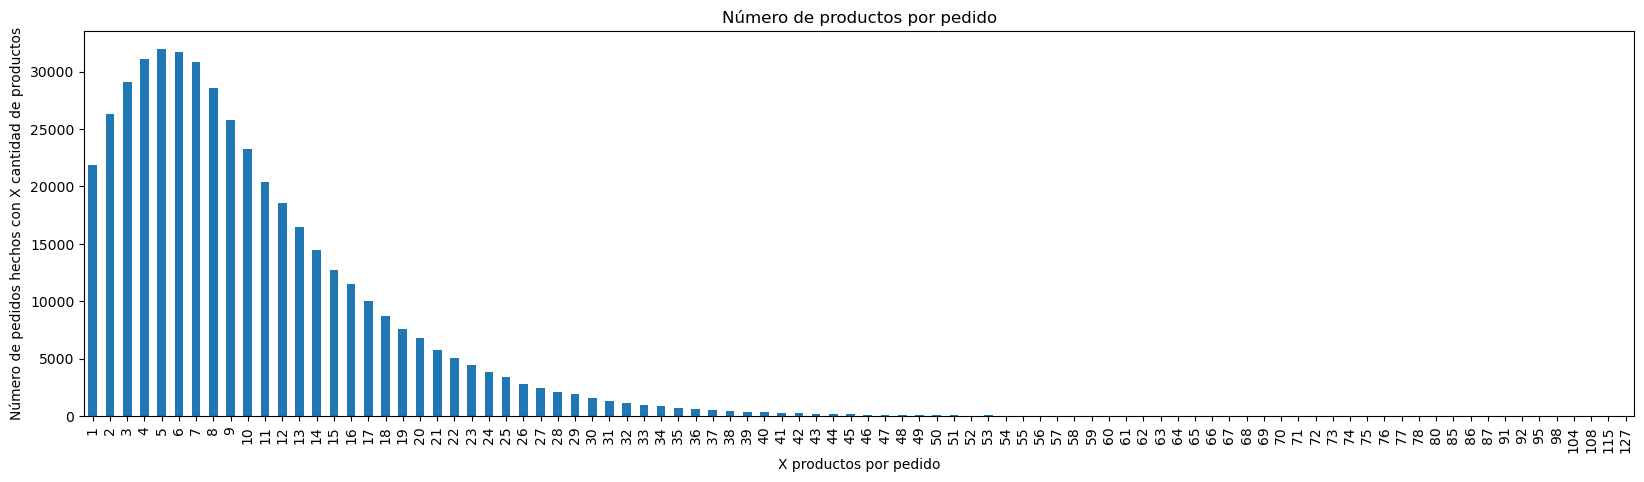

In [87]:
#Imprimo las primeras 15 filas del dataframe, ordenados por order_id. 
print(df_order_products.sort_values(by='order_id').head(15))
#Cuento el número de veces que se repite el número de cada orden en la columna 'order_id' y lo guardo en counts. Se genera una tabla que indica cada valor (order_id) de la columna y cuántas veces se repite
counts=df_order_products['order_id'].value_counts()

#Imprimo la tabla de conteo ordenada por order_id
print(counts.sort_index())
print()

#De la tabla anterior, vuelvo a contar el número de veces que aparece cada valor, es decir, cuántas veces se han hecho pedidos de X cantidad de productos. Imprimo la nueva tabla.
counts2=counts.value_counts().sort_index()
print(counts2)
print()

#Imprimo los valores mínimos y máximos de la nueva tabla para comparar
print(counts2.min())
print(counts2.max())
print(counts2.describe())

#Creo una gráfica de barras que utiliza como entrada la tabla de conteos. Grafica en X el número de productos en un pedido, y en Y cuántos pedidos se han hecho con esa cantidad de productos
counts2.plot(kind='bar',title='Número de productos por pedido',figsize=(20,5))
plt.xlabel('X productos por pedido')
plt.ylabel('Número de pedidos hechos con X cantidad de productos')
plt.show()
print()
# order4=(df_order_products['order_id']==61355).sum()
# print(order4)





Escribe aquí tus conclusiones

+ El dataframe muestra una distribución asimétrica positiva.
+ El máximo número de pedidos registrados con la misma cantidad de productos es de 31923. Se han realizado 31923 pedidos de 5 productos.
+ La media de los datos se muestra en 5000, muy distante del máximo de 31923. La media se ve afectada por la mayoría de pedidos en los que se agregan más de 40 productos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [88]:
#Imprimo una muestra del dataframe original
print(df_order_products)
#Filtro los productos que hay sido ordenados nuevamente y los guardo en el dataframe reordered
reordered=df_order_products[df_order_products['reordered']==1]
print(reordered)
#Cuento el número de veces que aparece cada producto en el dataframe anterior
reordered_counts=reordered['product_id'].value_counts()
print(reordered_counts)
#Busco por product_id todos estos productos en el dataframe products que contiene sus nombres
top20=df_products.merge(reordered_counts,on='product_id')

#Creo un nuevo dataframe que contenga sólo las columnas product_id, product_name y count (el número de veces que ese producto se ha ordenado
top20clean=top20[['product_id','product_name','count','aisle_id']]

#Ordeno el nuevo dataframe en orden descendente e imprimo sólo los primeros 20 elementos
print(top20clean.sort_values(by='count',ascending=False).head(20))


         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]
         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         25

Escribe aquí tus conclusiones

+ El top 20 de productos que se ordenan nuevamente pertenecen a los grupos de frutas y vegetales orgánicos a granel y empacados.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [89]:
# #Creo un nuevo dataframe que guarde sólo los productos que no han sido reordenados
# df_products_first_order=df_order_products[df_order_products['reordered']==0]
# print(df_products_first_order.sort_values(by='product_id'))

# #Creo un nuevo dataframe que guarde sólo los productos que ya se han ordenado más de una vez
# df_products_reordered=df_order_products[df_order_products['reordered']==1]
# print(df_products_reordered.sort_values(by='product_id'))

# #Cuento el número de veces que cada producto que no ha sido reordenado aparece en el dataframe y lo convierto a un nuevo dataframe
# first_order_counts=df_products_first_order['product_id'].value_counts().to_frame()
# print(first_order_counts.sort_index())

# #Cuento el número de veces que cada producto que ya ha sido reordenado aparece en el dataframe
# reordered_counts=df_products_reordered['product_id'].value_counts().to_frame()
# print(reordered_counts.sort_index())

# #Hago un merge interno de ambos dataframes para comparar los conteos, entre las veces que cada producto se ha ordenado por primera vez contra las veces que se ha reordenado
# merge=first_order_counts.merge(reordered_counts, on='product_id')
# #Modifico los nombres de las columnas para el dataframe nuevo
# merge.rename(columns={'count_x':'first order','count_y':'reordered'},inplace=True)
# #Calculo la proporción y la añado a una columna nueva
# merge['ratio %']=merge['reordered']/merge['first order']*100
# print(merge.sort_values(by='ratio %',ascending=False))

# # print(df_order_products.sort_values(by='order_id').head(30))
# # print(df_instacart_orders.sort_values(by='order_id').head(30))
# print(df_products.loc[df_products['product_id']==44626])

In [90]:
#Creo una agrupación por product_id que cuente las veces que aparecen en la tabla (total de productos tanto ordenados por primera vez como vueltos a ordenar)
groupby_total=df_order_products.groupby('product_id',as_index=False).count()

#Creo una agrupación por product_id que sume los valores de cada columna (para la columna reordered, da la suma de todos los 1's que aparecen)
groupby_reordered=df_order_products.groupby('product_id',as_index=False).sum() 

#Creo una agrupación por product_id que calcula la media de todas las columnas (la media en la columna reordered corresponde a dividir el valor de groupby_reordered / groupby_total, con esto compruebo que .mean() ya calculó la proporción)
groupby_mean=df_order_products.groupby('product_id',as_index=False).mean()

#Imprimo las tres agrupaciones sólo como referencia para mis comprobaciones
print(groupby_total)
print(groupby_reordered)
print(groupby_mean)

print(groupby_mean.max())
print(groupby_mean.min())
print()

#Conjunto las tablas groupby_mean y df_products para obtener los nombres de los productos
names=groupby_mean.merge(df_products,on='product_id')

#ELimino las columnas que no necesito y renombro la que usaré para mostrar la proporción
names=names.drop(labels=['order_id','add_to_cart_order','aisle_id'],axis='columns')
names=names.rename(columns={'reordered':'reordered_ratio'})

#Modifico la columna de proporción
names['reordered_ratio']=names['reordered_ratio']*100
print(names.sort_values(by='reordered_ratio',ascending=False).head(30))
print(names.sort_values(by='reordered_ratio',ascending=False).tail(30))
# names[names['reordered_ratio']==100.0]
# names[names['product_id']==154]

       product_id  order_id  add_to_cart_order  reordered
0               1       280                280        280
1               2        11                 11         11
2               3        42                 42         42
3               4        49                 49         49
4               7         2                  2          2
...           ...       ...                ...        ...
45568       49690         5                  5          5
45569       49691        72                 72         72
45570       49692        12                 12         12
45571       49693        25                 25         25
45572       49694         9                  9          9

[45573 rows x 4 columns]
       product_id   order_id  add_to_cart_order  reordered
0               1  505159738               1580        158
1               2   22291566                 96          0
2               3   68393258                292         31
3               4   83355604              

Escribe aquí tus conclusiones

+ La mayor proporción que encontré fue de 100%, que corresponde a un producto que se ordenó por un solo cliente y posteriormente se ordenó por el mismo cliente 20 veces más.
+ Hay muchos productos con una proporción de 100%, esto me sugiere que son productos populares, consumibles de poca duración, o ya tienen mucho tiempo en el catálogo.
+ Las proporciones de 0% me sugieren que los productos son impopulares, muy duraderos, o demasiado nuevos en el catálogo.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [91]:
# #Combino los dataframes de instacart_orders y order_products en un nuevo dataframe para tener todas las columnas que necesito
# merge=df_instacart_orders.merge(df_order_products,on='order_id')
# print()
# #Elimino columnas innecesarias de mi nuevo dataframe
# merge=merge.drop(labels=['order_number','order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order'],axis='columns')
# # print(merge)
# #Creo un nuevo dataframe para guardar todas las órdenes que se han hecho una sola vez y lo imprimo ordenado por user_id
# merge_first_order=merge[merge['reordered']==0]
# print(merge_first_order.sort_values(by='user_id').head(30))
# print()
# #Creo un nuevo dataframe para guardar todas las órdenes que se han repetido y lo imprimo ordenado por user_id
# merge_reordered=merge[merge['reordered']==1]
# print(merge_reordered.sort_values(by='user_id'))
# #Creo un nuevo dataframe en el que agrupo por user_id todas las órdenes hechas una sola vez
# first_order_groupby=merge_first_order.groupby(by='user_id',as_index=False).count()
# print(first_order_groupby)
# #Creo un nuevo dataframe en el que agrupo por user_id todas las órdenes hechas nuevamente
# reordered_groupby=merge_reordered.groupby(by='user_id',as_index=False).count()
# print(reordered_groupby)
# #Combino los dos dataframes que acabo de crear por user_id para mantener sólo los usuarios que han hecho tanto pedidos recurrentes como pedidos de primera vez
# ratio_merge=first_order_groupby.merge(reordered_groupby, on='user_id')
# print(ratio_merge)
# #Creo una columna nueva en el dataframe anterior que calcule la proporción entre el número de productos de primera vez y el número de productos que se han reordenado
# ratio_merge['order_ratio']=ratio_merge['reordered_y']/ratio_merge['reordered_x']*100
# #Imprimo la columna de proporciones ordenada de menor a mayor
# print(ratio_merge['order_ratio'].sort_values())

In [92]:
# print(df_order_products)
# print(df_instacart_orders)
#Conjunto las tablas df_order_products y df_instacart_orders para poder obtener los user_id
merge=df_order_products.merge(df_instacart_orders,on='order_id')

#Elimino todas las columnas que no necesito
merge=merge.drop(labels=['order_id','product_id','add_to_cart_order','order_number','order_dow','order_hour_of_day','days_since_prior_order'],axis='columns')
print(merge)

#Agrupo por user_id y calculo la media
groupby_user=merge.groupby(by='user_id',as_index=False).mean()

#Renombro la columna que mostrará las proporciones
groupby_user=groupby_user.rename(columns={'reordered':'reordered_ratio'})

#Modifico la columna de proporciones
groupby_user['reordered_ratio']=groupby_user['reordered_ratio']*100


print(groupby_user.sort_values(by='reordered_ratio').tail(30))
users_100=groupby_user[groupby_user['reordered_ratio']==100]
users_100_count=users_100['reordered_ratio'].count()
total_users=groupby_user['user_id'].count()
print(total_users)
fidelity=users_100_count/total_users*100
print(fidelity)

         reordered  user_id
0                0    58454
1                1   129474
2                1    47476
3                1   134505
4                1   155995
...            ...      ...
4545002          1    76414
4545003          0   163902
4545004          1      597
4545005          1     7124
4545006          0    85144

[4545007 rows x 2 columns]
        user_id  reordered_ratio
44276     61200            100.0
42106     58187            100.0
33811     46677            100.0
84962    117142            100.0
142695   196610            100.0
113400   156486            100.0
96122    132723            100.0
24430     33744            100.0
113411   156498            100.0
84963    117145            100.0
14673     20192            100.0
84985    117177            100.0
142676   196583            100.0
113373   156453            100.0
125272   172846            100.0
56681     78286            100.0
10944     14999            100.0
135854   187301            100.0
135853   

Escribe aquí tus conclusiones

+ Las proporciones de 100% sugieren que esos clientes gustan de usar la plataforma para sus compras.
+ Del total de usuarios registrados, el 5.41% tienen un 100% de proporción al reordenar productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [93]:
#Creo un nuevo dataframe que contiene sólo los productos que se añaden en primer lugar a las órdenes
first_products=df_order_products[df_order_products['add_to_cart_order']==1]
print(first_products)
print()

#Agrupo el dataframe anterior por product_id y cuento el número de veces que aparece cada producto
top_products=first_products.groupby(by='product_id',as_index=False).count()
print(top_products)
print()

#Combino el dataframe products con mi dataframe anterior para conseguir los nombres de los productos
product_names=df_products.merge(top_products,on='product_id')
product_names=product_names.drop(labels=['add_to_cart_order','reordered'],axis='columns')
print(product_names)
print()
#Imprimo el dataframe anterior ordenado por el número de veces que apareció en mi lista, y elimino columnas que no necesito
print(product_names.sort_values(by='order_id',ascending=False).head(20))

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
14        1961225       37553                  1          1
16         639939       10017                  1          1
23         750040        8518                  1          0
...           ...         ...                ...        ...
4544978   1759009       46175                  1          0
4544989    115427       20842                  1          1
4544990   2049780       28576                  1          1
4544997   2300092       10017                  1          0
4544999   1622300       24852                  1          1

[450046 rows x 4 columns]

       product_id  order_id  add_to_cart_order  reordered
0               1        47                 47         47
1               2         2                  2          2
2               3         5                  5          5
3               4   

In [94]:
#Creo un nuevo dataframe que contiene sólo los productos que se añaden en primer lugar a las órdenes e imprimo 20 registros
first_products=df_order_products[df_order_products['add_to_cart_order']==1]
print(first_products.head(20))

#Agrupo el dataframe anterior por product_id y cuento el número de veces que aparecen
top_products=first_products.groupby(by='product_id',as_index=False).count()

#Ordeno el dataframe e imprimo 20 registros
top_products=top_products.sort_values(by='order_id',ascending=False).head(20)

#*************Esta era la línea que tenía incorrecta***************************
# top_products=top_products.head(20).sort_values(by='order_id',ascending=False)
#******************************************************************************
print(top_products)

#Combino el dataframe products con mi dataframe anterior para conseguir los nombres de los productos
product_names=df_products.merge(top_products,on='product_id')

#Imprimo el dataframe antrior ordenado por el número de veces que apareción en mi lista, y elimino columnas que no necesito
display(product_names.sort_values(by='order_id',ascending=False).drop(labels=['add_to_cart_order','reordered'],axis='columns'))

     order_id  product_id  add_to_cart_order  reordered
1      567889        1560                  1          1
2     2261212       26683                  1          1
14    1961225       37553                  1          1
16     639939       10017                  1          1
23     750040        8518                  1          0
33    2291457       27104                  1          1
43    3075384       28799                  1          1
45    1787676       47672                  1          1
54    3266094       12763                  1          1
56    1594605       34217                  1          1
70     450917       21436                  1          1
90     505943       13176                  1          1
93     286653       23115                  1          0
108   2699857       45007                  1          1
109   3176371       24852                  1          1
121   1861131       47766                  1          1
132    558229        8061                  1    

,product_id,product_name,aisle_id,department_id,order_id
8,24852,Banana,24,4,15562
3,13176,Bag of Organic Bananas,24,4,11026
11,27845,Organic Whole Milk,84,16,4363
6,21137,Organic Strawberries,24,4,3946
16,47209,Organic Hass Avocado,24,4,3390
7,21903,Organic Baby Spinach,123,4,3336
18,47766,Organic Avocado,24,4,3044
5,19660,Spring Water,115,7,2336
4,16797,Strawberries,24,4,2308
12,27966,Organic Raspberries,123,4,2024


Escribe aquí tus conclusiones

+ El producto que más se añade en primer lugar son las bananas.
+ La mayoría de los productos que se añaden primero a las órdenes pertenecen al grupo de frutas frescas.

### Conclusion general del proyecto:

+ No fue necesario hacer modificaciones en los nombres de columnas para los archivos csv, aunque sí hubo que especificar que el delimitador es ';' y no ','.
+ Identifiqué y procesé los valores ausentes de todos los archivos, no se eliminó ningún registro.
+ Había columnas cuyos valores eran de tipo punto flotante, sin embargo, durante el desarrollo del proyecto este hecho no afectó a los cálculos.
+ Encontré productos que no tenían un nombre registrado, en total 1258.
+ Los productos que no tienen nombre pertenecían a la isla 100 y departamento 21, cuya descripción es "missing". Puede que sean productos que ya no están disponibles en el catálogo de la tienda.
+ En el archivo de registro de órdenes fatan números de orden, deberían ser consecutivos.
+ al parecer el sistema registra como máximo 64 artículos por orden, después de eso les coloca NaN en el campo para contar en qué orden se añadieron.
+ Había órdenes duplicadas que fueron eliminadas del análisis.
+ Encontré que la hora pico de órdenes es a las 10 y 11 am.
+ La mayor cantidad de órdenes se registran los domingos.
+ El número máximo de órdenes registradas por cliente es de 100 órdenes.
+ Los productos más populares son frutas y vegetales frescos y empacados.
+ La media de productos agregados a una orden es de 5 productos.
+ El top 20 de productos que más se añaden como primera opción pertenecen al grupo de frutas frescas.